In [1]:
#Import packages
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.special import boxcox1p
import seaborn as sns
import warnings
from math import sqrt
import pylab
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\Luxo_Jr\AppData\Local\Continuum\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import data
song_data = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_data.csv')
song_info = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_info.csv')

#Shape of data
print('song_data shape: ' + str(song_data.shape))
print('sing_info shape: ' + str(song_info.shape))

song_data shape: (18835, 15)
sing_info shape: (18835, 4)


In [3]:
#Columns
print('song_data columns: ' + str(list(song_data.columns)))
print('song_info columns: ' + str(list(song_info.columns))) 

song_data columns: ['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']
song_info columns: ['song_name', 'artist_name', 'album_names', 'playlist']


In [4]:
#Convert song_duration
song_data['song_duration_min'] = (song_data.song_duration_ms/1000)/60
song_data.drop(columns = ['song_name', 'song_duration_ms'], inplace = True)

# Boxcox Transform

In [5]:
#Boxcox Transform
cols_ = ['acousticness', 'instrumentalness', 'time_signature', 'song_duration_min', 'speechiness']
for col in cols_:
    if song_data[col].min() == 0: 
        song_data[col] = song_data[col] + 0.000001
    song_data[col] = stats.boxcox(song_data[col])[0]

In [6]:
song_data.describe()

,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
count,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,-1.648372,0.633348,0.644995,-21.708490,5.289196,0.179650,-7.447435,0.628139,-2.893215,121.073154,39.306755,0.527967,1.346259
std,21.905654,1.029770,0.156723,0.214101,13.468143,3.614595,0.143984,3.827831,0.483314,0.930344,28.714456,7.970242,0.244632,0.289508
min,0.000000,-3.958525,0.000000,0.001070,-35.674188,0.000000,0.010900,-38.768000,0.000000,-21.814146,0.000000,-0.278891,0.000000,-1.484638
25%,40.000000,-2.447523,0.533000,0.510000,-35.674188,2.000000,0.092900,-9.044000,0.000000,-3.630221,98.368000,39.918617,0.335000,1.188999
50%,56.000000,-1.598013,0.645000,0.674000,-24.142955,5.000000,0.122000,-6.555000,1.000000,-3.165581,120.013000,39.918617,0.527000,1.343101
75%,69.000000,-0.774195,0.748000,0.815000,-8.737671,8.000000,0.221000,-4.908000,1.000000,-2.274877,139.931000,39.918617,0.725000,1.502336
max,100.000000,-0.004006,0.987000,0.999000,-0.003004,11.000000,0.986000,1.585000,1.000000,-0.060925,242.318000,89.192146,0.984000,4.062953


# Train-test split

In [7]:
#Training and test sets
X = song_data.drop('song_popularity', axis = 1)
y = song_data.song_popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (13184, 13)
y_train shape: (13184,)
X_test shape: (5651, 13)
y_test shape: (5651,)


# Lasso Regression

In [8]:
#Model definition
lasso_ = Lasso(max_iter = 1000)

lasso_params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}

#Gridsearch cross-validation 
lasso_model = GridSearchCV(lasso_, param_grid = lasso_params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_model.fit(X_train, y_train)
lasso_preds_train = lasso_model.predict(X_train)
lasso_preds_test = lasso_model.predict(X_test)

In [9]:
#Best Params/score
print('Best Params: ' + str(lasso_model.best_params_))
print('Best Score: ' + str(abs(lasso_model.best_score_)))

Best Params: {'alpha': 0.01}
Best Score: 453.1598275046737


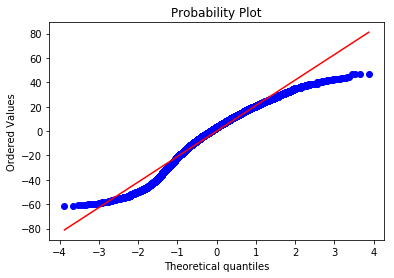

In [11]:
#Train probability Plot
lasso_res = y_train - lasso_preds_train
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(lasso_res, dist="norm", plot=pylab)
pylab.show()

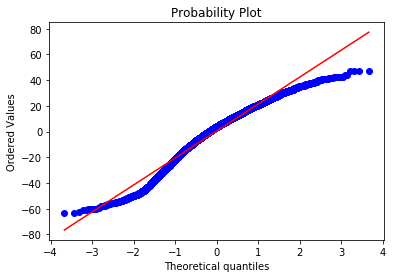

In [12]:
#Test probability Plot
lasso_res = y_test - lasso_preds_test
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(lasso_res, dist="norm", plot=pylab)
pylab.show()

Train Root Mean Square Error: 21.243822766113688
Test Root Mean Square Error: 21.302226282612086


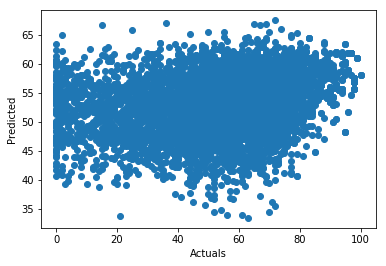

In [13]:
#Prediction on test set/plot predicted vs. actuals
plt.scatter(y_test, lasso_preds_test)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
#Train RMSE
train_rmse = sqrt(mean_squared_error(y_train, lasso_preds_train))
#Test RMSE
test_rmse = sqrt(mean_squared_error(y_test, lasso_preds_test)) 
print('Train Root Mean Square Error: ' + str(train_rmse))
print('Test Root Mean Square Error: ' + str(test_rmse))